In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.array([
    [0.1, 0.9],
    [0.15, 0.88],
    [0.22, 0.7],
    [0.3, 0.6],
    [0.38, 0.56],
    [0.42, 0.55],
    [0.5, 0.5],
    [0.6, 0.4],
    [0.7, 0.2],
    [0.9, 0.1],
    [0.99, 0.06],
])
np.random.shuffle(data)
data

array([[0.38, 0.56],
       [0.7 , 0.2 ],
       [0.3 , 0.6 ],
       [0.9 , 0.1 ],
       [0.22, 0.7 ],
       [0.5 , 0.5 ],
       [0.99, 0.06],
       [0.1 , 0.9 ],
       [0.42, 0.55],
       [0.15, 0.88],
       [0.6 , 0.4 ]])

In [3]:
df = pd.DataFrame(data, columns=['x', 'y']).sort_values(by='x')
df

,x,y
7,0.10,0.90
9,0.15,0.88
4,0.22,0.70
2,0.30,0.60
0,0.38,0.56
8,0.42,0.55
5,0.50,0.50
10,0.60,0.40
1,0.70,0.20
3,0.90,0.10


In [4]:
data_sorted = data[data[:,0].argsort()]
data_sorted

array([[0.1 , 0.9 ],
       [0.15, 0.88],
       [0.22, 0.7 ],
       [0.3 , 0.6 ],
       [0.38, 0.56],
       [0.42, 0.55],
       [0.5 , 0.5 ],
       [0.6 , 0.4 ],
       [0.7 , 0.2 ],
       [0.9 , 0.1 ],
       [0.99, 0.06]])

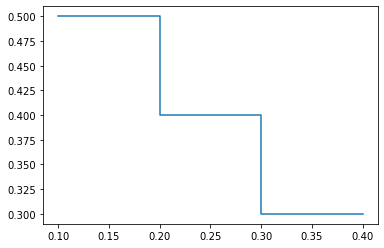

In [5]:
plt.plot([0.1, 0.2, 0.2, 0.3, 0.3, 0.4], [0.5, 0.5, 0.4, 0.4, 0.3, 0.3])

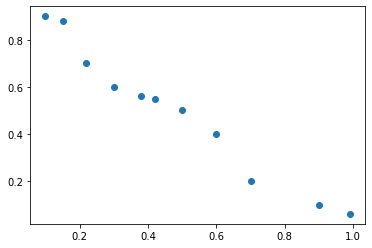

In [6]:
plt.scatter(data_sorted[:,0], data_sorted[:,1])

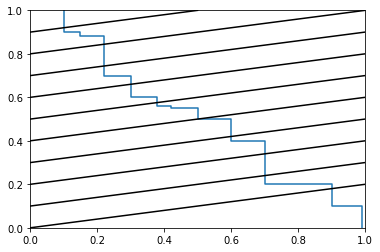

In [7]:
x = [data_sorted[:,0].min(), data_sorted[0][0]]
y = [1.0, data_sorted[0][1]]

#x = []
#y = []

for i in range(1, len(data_sorted)):
    current = data_sorted[i]
    prev = data_sorted[i - 1]
    
    x.append(current[0])
    y.append(prev[1])
    
    x.append(current[0])
    y.append(current[1])

x.append(data_sorted[-1][0])
y.append(0.0)
    
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.plot(x, y);


for i in range(0, 10):
    plt.axline((0, i * 0.1), slope=0.2, color='black')

In [8]:
# y = 0.2x + 0.1
# x = 5y - 0.5

In [9]:
np.arange?

In [10]:
# horizontal line segment, [0.4, 0.5] at y=0.5

In [11]:
horizontal_segments = np.array([
    [0.1, 0.4],
    [0.4, 0.5],
    [0.5, 0.6],
    [0.6, 0.8],
    [0.8, 0.95]
])
horizontal_segments.shape

(5, 2)

In [12]:
y_val = np.array([
    0.8,
    0.7,
    0.5,
    0.4,
    0.2
    ])
y_val

array([0.8, 0.7, 0.5, 0.4, 0.2])

In [13]:
intercept_points = horizontal_segments * 0.2 + 0.1
intercept_points

array([[0.12, 0.18],
       [0.18, 0.2 ],
       [0.2 , 0.22],
       [0.22, 0.26],
       [0.26, 0.29]])

In [14]:
horizontal_segments[(intercept_points[:,0] <= y_val) & (y_val <= intercept_points[:,1])]

array([], shape=(0, 2), dtype=float64)

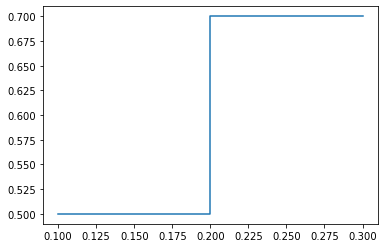

In [15]:
x = [0.1, 0.2, 0.2, 0.3]
y = [0.5, 0.5, 0.7, 0.7]
plt.plot(x, y)

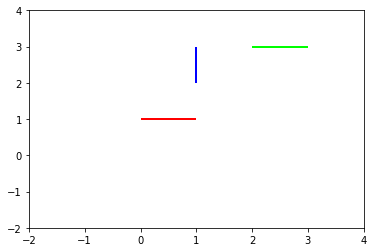

In [16]:
from matplotlib import collections  as mc
lines = [[(0, 1), (1, 1)], [(2, 3), (3, 3)], [(1, 2), (1, 3)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])

lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = plt.subplots()
ax.set_xlim(-2, 4)
ax.set_ylim(-2, 4)
ax.add_collection(lc)

In [17]:
list(zip(horizontal_segments))

[(array([0.1, 0.4]),),
 (array([0.4, 0.5]),),
 (array([0.5, 0.6]),),
 (array([0.6, 0.8]),),
 (array([0.8 , 0.95]),)]

In [18]:
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection
# In order to efficiently plot many lines in a single set of axes,
# Matplotlib has the ability to add the lines all at once. Here is a
# simple example showing how it is done.

x = np.arange(100)
ys = x[:50, np.newaxis] + x[np.newaxis, :]
ys.shape

(50, 100)

In [19]:
segs = np.zeros((50, 100, 2))
segs[:, :, 1] = ys
segs[:, :, 0] = x

In [20]:
segs_masked = np.ma.masked_where((segs > 50) & (segs < 60), segs)

In [21]:
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
segs_masked.shape

(50, 100, 2)

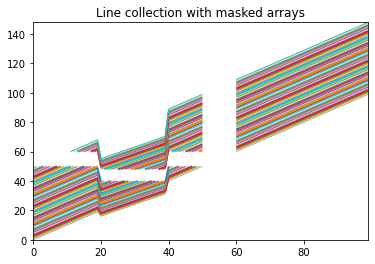

In [22]:
segs_masked2 = segs_masked.copy()
segs_masked2[:, 20:40, 1] = segs_masked[:, 20:40, 1] * 0.8
fig, ax = plt.subplots()
ax.set_xlim(x.min(), x.max())
ax.set_ylim(ys.min(), ys.max())
line_segments = LineCollection(segs_masked2[:, :, :], linewidths=(0.5, 1, 1.5, 2),
                               colors=colors, linestyle='solid')
ax.add_collection(line_segments)
ax.set_title('Line collection with masked arrays')
plt.show()

In [23]:
from matplotlib import colors as mcolors
from matplotlib.collections import LineCollection
colors = [mcolors.to_rgba(c)
          for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
lines = [[(1, 1), (2, 2)]]

def draw(data):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    line_segments = LineCollection(data, linewidths=(0.5, 1, 1.5, 2),
                                   colors=colors, linestyle='solid')
    ax.add_collection(line_segments)
    plt.show()

In [24]:
a = np.array([1, 1, 2, 2, 2, 4, 5, 5, 3, 3, 6, 2]).reshape((2, 3, 2))
a

array([[[1, 1],
        [2, 2],
        [2, 4]],

       [[5, 5],
        [3, 3],
        [6, 2]]])

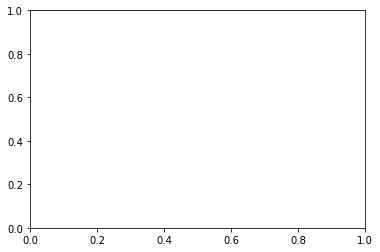

In [25]:
draw(a)

In [26]:
segs_masked[1, :, 1]

masked_array(data=[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0,
                   11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0,
                   20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0,
                   29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0,
                   38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0,
                   47.0, 48.0, 49.0, 50.0, --, --, --, --, --, --, --, --,
                   --, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0,
                   68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0,
                   77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0,
                   86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0,
                   95.0, 96.0, 97.0, 98.0, 99.0, 100.0],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False, False,
                   False, False, False, False, False, False, False

In [27]:
horizontal_segments

array([[0.1 , 0.4 ],
       [0.4 , 0.5 ],
       [0.5 , 0.6 ],
       [0.6 , 0.8 ],
       [0.8 , 0.95]])

In [28]:
line_segments = np.empty((horizontal_segments.shape[0], 2, 2))
line_segments[:] = horizontal_segments[:, :, np.newaxis]
line_segments[:, :, 1] = y_val[np.newaxis, np.newaxis, :]
line_segments

ValueError: could not broadcast input array from shape (1,5) into shape (5,2)

In [29]:
y_val

array([0.8, 0.7, 0.5, 0.4, 0.2])

In [30]:
y_val[np.newaxis, np.newaxis, :]

array([[[0.8, 0.7, 0.5, 0.4, 0.2]]])

In [31]:
yval2 = np.array([[i, i] for i in y_val])

In [32]:
line_segments = np.empty((horizontal_segments.shape[0], 2, 2))
line_segments[:] = horizontal_segments[:, :, np.newaxis]
line_segments[:, :, 1] = yval2
line_segments

array([[[0.1 , 0.8 ],
        [0.4 , 0.8 ]],

       [[0.4 , 0.7 ],
        [0.5 , 0.7 ]],

       [[0.5 , 0.5 ],
        [0.6 , 0.5 ]],

       [[0.6 , 0.4 ],
        [0.8 , 0.4 ]],

       [[0.8 , 0.2 ],
        [0.95, 0.2 ]]])

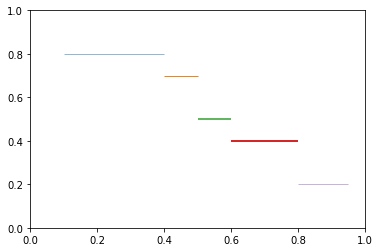

In [33]:
draw(line_segments)

In [34]:
line_segments.shape

(5, 2, 2)

In [35]:
line_segments[1]


array([[0.4, 0.7],
       [0.5, 0.7]])

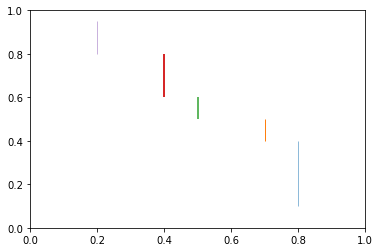

In [36]:
draw(line_segments[:, :, ::-1])

In [37]:
pareto_front = data_sorted
pareto_front

array([[0.1 , 0.9 ],
       [0.15, 0.88],
       [0.22, 0.7 ],
       [0.3 , 0.6 ],
       [0.38, 0.56],
       [0.42, 0.55],
       [0.5 , 0.5 ],
       [0.6 , 0.4 ],
       [0.7 , 0.2 ],
       [0.9 , 0.1 ],
       [0.99, 0.06]])

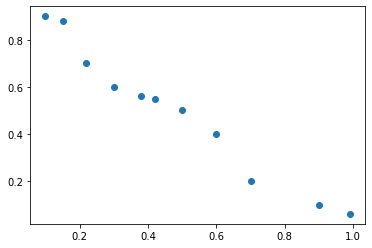

In [38]:
plt.scatter(pareto_front[:,0], pareto_front[:,1])

In [39]:
x_max = y_max = 1

n_points = pareto_front.shape[0]
horizontal = np.empty((n_points, 2, 2))
for i in range(n_points - 1):
    start = pareto_front[i][0]
    stop = pareto_front[i+1][0]
    y = pareto_front[i][1]
    horizontal[i, :, 0] = start, stop
    horizontal[i, :, 1] = y
horizontal[n_points - 1] = np.array([pareto_front[-1, 0], pareto_front[-1, 1], x_max, pareto_front[-1, 1]]).reshape((2, 2))
#horizontal[n_points - 1] = np.array([pareto_front, pareto_front[-1, 1], x_max, pareto_front[-1,1]]).reshape((2, 2))

vertical = np.empty((n_points, 2, 2))
for i in range(n_points - 1):
    start = pareto_front[i][1]
    stop = pareto_front[i+1][1]
    x = pareto_front[i+1][0]
    vertical[i+1, :, 0] = x
    vertical[i+1, :, 1] = start, stop
vertical[0] = np.array([pareto_front[0,0], y_max, pareto_front[0,0], pareto_front[0,1]]).reshape((2, 2))

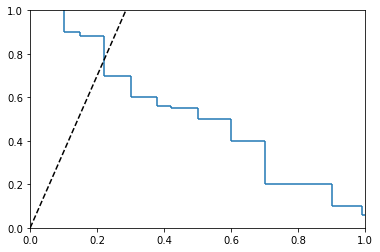

In [40]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
lines = np.append(horizontal, vertical, axis=0)
line_segments = LineCollection(lines)
ax.add_collection(line_segments)
ax.axline((0, 0), slope=3.5, color='black', ls='--')
#plt.scatter(pareto_front[:, 0], pareto_front[:, 1])

In [41]:
horizontal

array([[[0.1 , 0.9 ],
        [0.15, 0.9 ]],

       [[0.15, 0.88],
        [0.22, 0.88]],

       [[0.22, 0.7 ],
        [0.3 , 0.7 ]],

       [[0.3 , 0.6 ],
        [0.38, 0.6 ]],

       [[0.38, 0.56],
        [0.42, 0.56]],

       [[0.42, 0.55],
        [0.5 , 0.55]],

       [[0.5 , 0.5 ],
        [0.6 , 0.5 ]],

       [[0.6 , 0.4 ],
        [0.7 , 0.4 ]],

       [[0.7 , 0.2 ],
        [0.9 , 0.2 ]],

       [[0.9 , 0.1 ],
        [0.99, 0.1 ]],

       [[0.99, 0.06],
        [1.  , 0.06]]])

In [42]:
# y = 0.2x + 0.1
# x = 5y - 0.5
horizontal[0]

array([[0.1 , 0.9 ],
       [0.15, 0.9 ]])

In [43]:
horizontal[0, :, 0] 

array([0.1 , 0.15])

In [44]:
(horizontal[:, 0, 0] * 3.5 < horizontal[:, 0, 1]) & (horizontal[:, 1, 0] * 3.5 > horizontal[:, 1, 1])

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [45]:
horizontal_m8 = horizontal.copy()
horizontal_m8[:, :, 0] *= 8
horizontal_m8;

In [46]:
hit = horizontal[(horizontal_m8[:, 0, 0] < horizontal_m8[:, 0, 1]) & (horizontal_m8[:, 1, 0] > horizontal_m8[:, 1, 1])]

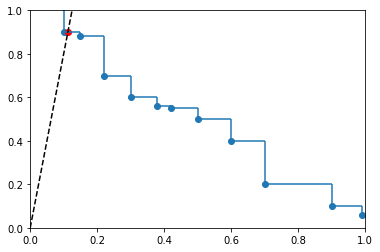

In [47]:
if hit.size > 0:
    y_hit = hit[0,0,1]
    # y = 8x
    x_hit = y_hit / 8

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
lines = np.append(horizontal, vertical, axis=0)
line_segments = LineCollection(lines)
ax.add_collection(line_segments)
ax.axline((0, 0), slope=8, color='black', ls='--')
plt.scatter(pareto_front[:, 0], pareto_front[:, 1])
plt.scatter(x_hit, y_hit, color='red')

In [48]:
hit[0,0,1]

0.9

In [ ]:
horizontal

In [ ]:
vertical

In [49]:
seggy = vertical[2].copy()
seggy

array([[0.22, 0.88],
       [0.22, 0.7 ]])

In [50]:
seggy[:, 0] * 3.5

array([0.77, 0.77])

In [51]:
v_m8 = vertical.copy()
v_m8[:, :, 0] *= 3.5
v_m8

array([[[0.35 , 1.   ],
        [0.35 , 0.9  ]],

       [[0.525, 0.9  ],
        [0.525, 0.88 ]],

       [[0.77 , 0.88 ],
        [0.77 , 0.7  ]],

       [[1.05 , 0.7  ],
        [1.05 , 0.6  ]],

       [[1.33 , 0.6  ],
        [1.33 , 0.56 ]],

       [[1.47 , 0.56 ],
        [1.47 , 0.55 ]],

       [[1.75 , 0.55 ],
        [1.75 , 0.5  ]],

       [[2.1  , 0.5  ],
        [2.1  , 0.4  ]],

       [[2.45 , 0.4  ],
        [2.45 , 0.2  ]],

       [[3.15 , 0.2  ],
        [3.15 , 0.1  ]],

       [[3.465, 0.1  ],
        [3.465, 0.06 ]]])

In [52]:
hit = vertical[(v_m8[:, 0, 0] < v_m8[:, 0, 1]) & (v_m8[:, 1, 0] > v_m8[:, 1, 1])]

In [ ]:
hit

In [53]:
x_max = y_max = 1
n_points = pareto_front.shape[0]
lines = np.empty((n_points * 2, 2, 2))

for i in range(n_points - 1):
    idx = 2 * i + 1
    start = pareto_front[i][0]
    stop = pareto_front[i+1][0]
    y = pareto_front[i][1]
    lines[idx, :, 0] = start, stop
    lines[idx, :, 1] = y
#horizontal[n_points - 1] = np.array([pareto_front, pareto_front[-1, 1], x_max, pareto_front[-1,1]]).reshape((2, 2))

for i in range(n_points - 1):
    idx = 2 * i + 2
    start = pareto_front[i][1]
    stop = pareto_front[i+1][1]
    x = pareto_front[i+1][0]
    lines[idx, :, 0] = x
    lines[idx, :, 1] = start, stop
lines[0] = np.array([pareto_front[0,0], y_max, pareto_front[0,0], pareto_front[0,1]]).reshape((2, 2))
lines[-1] = np.array([pareto_front[-1, 0], pareto_front[-1, 1], x_max, pareto_front[-1, 1]]).reshape((2, 2))

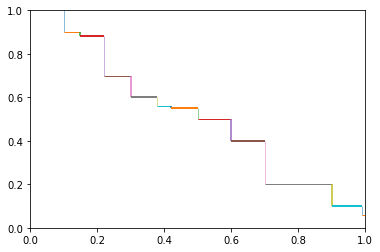

In [54]:
draw(lines)

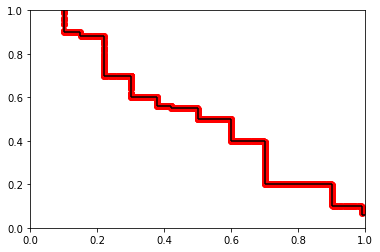

In [58]:
def hit_pt(line_segment, slope, intercept):
    if line_segment[0,1] == line_segment[1,1]:
        # Y values are the same, so the segment is horizontal
        # If y = mx + b, then x = (y - b) / m, and we know y, m, and b
        y = line_segment[0,1]
        x = (y - intercept) / slope
    elif line_segment[0,0] == line_segment[1,0]:
        # X values are the same, so it should be a vertical segment
        x = line_segment[0,0]
        y = (slope * x) + intercept
    return x, y

fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
line_segments = LineCollection(lines, color='black')
ax.add_collection(line_segments)



    #    intercept -= 0.2 * slope
for slope in np.power(np.linspace(0.2, 1.8, 10), 4):
  for x_shift in np.linspace(-0.2, 0.85, 10):
    for y_shift in np.linspace(-0.5, 0.7, 10):
        intercept = y_shift - x_shift * slope
        lines_copy = lines.copy()
        lines_copy[:, :, 0] = (lines_copy[:, :, 0] * slope) + intercept
        hit_left = lines_copy[:, 0, 0] <= lines_copy[:, 0, 1]
        hit_right = lines_copy[:, 1, 0] >= lines_copy[:, 1, 1]
        hit = lines[hit_left & hit_right]
        if hit.shape[0] == 0:
            pass
            #ax.axline((0, intercept), slope=slope, color='red', linestyle='--')
        else:
            x, y = hit_pt(hit[0], slope, intercept)
#        ax.axline((0,intercept), slope=slope, color='blue', linestyle='--')
            plt.scatter(x, y, color='red')

In [ ]:
np.

In [ ]:
hit[0,0,0]

In [ ]:
pareto_front_2 = np.array([
    [0.05, 0.95],
    [0.2, 0.88],
    [0.25, 0.85],
    [0.3, 0.6],
    [0.4, 0.5],
    [0.7, 0.3],
    [0.9, 0.1]
])
pareto_front_2

In [ ]:
pf2 = pareto_front + np.random.normal(0, 0.02, pareto_front.shape)
pf3 = pareto_front + np.random.normal(0.1, 0.02, pareto_front.shape)
fronts = np.array([pareto_front, pf2, pf3])
fronts[fronts < 0.001] = 0.001

In [ ]:
plt.scatter(x=fronts[0,:,0], y=fronts[0,:,1], marker='o', color='green')
plt.scatter(x=fronts[1,:,0], y=fronts[1,:,1], marker='v', color='blue')
plt.scatter(x=fronts[2,:,0], y=fronts[2,:,1], marker='^', color='red')

In [ ]:
x_max = fronts[:,:,0].max()
y_max = fronts[:,:,1].max()

In [ ]:
def attainment_lines(pareto_front):
    n_points = pareto_front.shape[0]
    lines = np.empty((n_points * 2, 2, 2))

    for i in range(n_points - 1):
        idx = 2 * i + 1
        start = pareto_front[i][0]
        stop = pareto_front[i+1][0]
        y = pareto_front[i][1]
        lines[idx, :, 0] = start, stop
        lines[idx, :, 1] = y

    for i in range(n_points - 1):
        idx = 2 * i + 2
        start = pareto_front[i][1]
        stop = pareto_front[i+1][1]
        x = pareto_front[i+1][0]
        lines[idx, :, 0] = x
        lines[idx, :, 1] = start, stop
    lines[0] = np.array([pareto_front[0,0], y_max, pareto_front[0,0], pareto_front[0,1]]).reshape((2, 2))
    lines[-1] = np.array([pareto_front[-1, 0], pareto_front[-1, 1], x_max, pareto_front[-1, 1]]).reshape((2, 2))
    return lines


fig, ax = plt.subplots()
ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

for lines in map(attainment_lines, fronts):
    line_segments = LineCollection(lines, color='black')
    ax.add_collection(line_segments)
    
plt.scatter(x=fronts[0,:,0], y=fronts[0,:,1], marker='o', color='green')
plt.scatter(x=fronts[1,:,0], y=fronts[1,:,1], marker='v', color='blue')
plt.scatter(x=fronts[2,:,0], y=fronts[2,:,1], marker='^', color='red')
plt.show()

In [ ]:
fronts.shape

In [ ]:
x_max = fronts[:, :, 0].max()
x_max

In [ ]:
fig, ax = plt.subplots()
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)

lines = attainment_lines(pareto_front_2)
    
plt.scatter(x=pareto_front_2[:,0], y=pareto_front_2[:,1], marker='o', color='green')
ax.add_collection(LineCollection(lines))

plt.show()